## Exercise 1.2: Design and test K-nearest neighbor (KNN) classification on MNIST data

### (I) Run mnistKNNdemo (from pyprobml or pmtk3) on the first 1000 test samples of the MNIST data. Compare the misclassification rates. 

KNN Classifier from pyprobml is applied to a 2d dataset with 3 classes. MNIST dataset has 784 features and 10 classes. we will need to try and see if it will run, and if not adjust it for the multidimensiona data in the dataset.

In [78]:
# First we Import the data

import numpy as np
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [41]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [79]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
X.shape

(70000, 784)

In [80]:
y.shape

(70000,)

In [95]:
ntrain = 1000
ntest = 70000-ntrain
x_train = X[:ntrain]
y_train = y[:ntrain]
x_test = X[ntest:]
y_test = y[ntest:]

In [96]:
x_train.shape

(1000, 784)

In [97]:
y_train.shape

(1000,)

In [98]:
x_test.shape

(1000, 784)

In [99]:
y_test.shape

(1000,)

In [100]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([ 97, 116,  99,  93, 105,  92,  94, 117,  87, 100], dtype=int64))
(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([102, 119,  99, 102,  92,  85, 102, 115,  94,  90], dtype=int64))


In [102]:
from sklearn.neighbors import KNeighborsClassifier
import timeit

kVals = np.arange(1,100,10)

for k in kVals:
    start = timeit.default_timer()
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    end = timeit.default_timer()
    # evaluate the model and update the accuracies list
    score = model.score(x_test, y_test)
    print("k=%d, accuracy=%.2f%%, time=%.4f" % (k, score * 100,end-start))

k=1, accuracy=91.50%, time=0.0026
k=11, accuracy=86.70%, time=0.0020
k=21, accuracy=85.20%, time=0.0015
k=31, accuracy=82.70%, time=0.0024
k=41, accuracy=81.10%, time=0.0026
k=51, accuracy=79.70%, time=0.0017
k=61, accuracy=78.60%, time=0.0018
k=71, accuracy=77.20%, time=0.0023
k=81, accuracy=75.40%, time=0.0024
k=91, accuracy=73.90%, time=0.0019


In [103]:
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       102
           1       0.90      1.00      0.95       119
           2       0.96      0.75      0.84        99
           3       0.96      0.92      0.94       102
           4       0.96      0.89      0.93        92
           5       0.85      0.88      0.87        85
           6       0.97      0.95      0.96       102
           7       0.88      0.93      0.90       115
           8       0.92      0.91      0.92        94
           9       0.84      0.90      0.87        90

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.91      1000



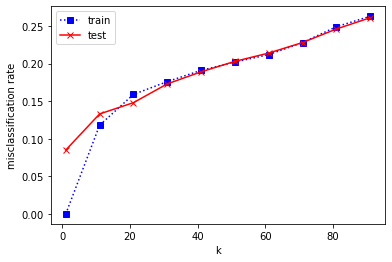

In [104]:
#plot train err and test err with different k
#ks = [int(n) for n in np.linspace(1, ntrain, 10)]
ks = np.arange(1,100,10)
train_errs = []
test_errs = []
for k in ks:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  train_errs.append(1 - knn.score(x_train, y_train))
  test_errs.append(1 - knn.score(x_test, y_test))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.show()



Text(0.5, 1.0, '5-fold cross validation, n-train = 1000')

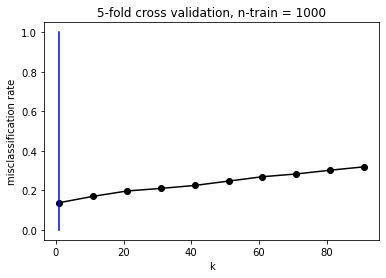

In [106]:
#cross_validate
scores = []
for k in ks:
    knn = KNN(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5)
    scores.append(1 - score.mean())
plt.figure()
plt.plot(ks, scores, 'ko-')
min_k = ks[np.argmin(scores)]
plt.plot([min_k, min_k], [0, 1.0], 'b-')
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.title('5-fold cross validation, n-train = 1000')


### (II) Combine FLANN (https://github.com/mariusmuja/flann (Links to an external site.)) for approximate nearest neighbor search with mnistKNNdemo to classify the first 1000 test samples of the MNIST data.

In [107]:
from pyflann import *

flann = FLANN()
result, dists = flann.nn(x_train, x_test, 2, algorithm="kmeans", branching=32, iterations=7, checks=16)
print (result)
print (dists)

[[337 981]
 [ 90 238]
 [587 593]
 ...
 [797 707]
 [921 175]
 [841 721]]
[[1911866. 2270327.]
 [3369473. 4139158.]
 [ 576673.  810879.]
 ...
 [1967980. 2360922.]
 [2194037. 2468517.]
 [2254531. 2275453.]]


 ### (III) Design and test multinomial logistic regression for the MNIST data. 

### (IV) Compare the computation time and misclassification rates of the classifiers in (I)-(III).